In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(500)
file_path=r"C:\Uni_doc\text classification\Source_text.csv"
Corpus = pd.read_csv(file_path,delimiter=',',encoding='latin-1')
Corpus.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
Corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
#Corpus.SentimentText=Corpus.SentimentText.astype(str)
Corpus.category=Corpus.category.astype(str)
Corpus.text=Corpus.text.astype(str)

sns.countplot(Corpus.category)
plt.xlabel('Category')
plt.title('CountPlot')

>>> import nltk
>>> nltk.download('punkt')

nltk.download()

In [6]:
# 1. Removing Blank Spaces
Corpus['text'].dropna(inplace=True)
# 2. Changing all text to lowercase
Corpus['text_original'] =str( Corpus['text'])
Corpus['text'] = [entry.lower() for entry in Corpus['text']]
# 3. Tokenization-In this each entry in the corpus will be broken into set of words
Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]
# 4. Remove Stop words, Non-Numeric and perfoming Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun 
# or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

Corpus.head()

,category,text,text_original
0,tech,"[tv, future, in, the, hands, of, viewers, with...",0 tv future in the hands of viewers with...
1,business,"[worldcom, boss, left, books, alone, former, w...",0 tv future in the hands of viewers with...
2,sport,"[tigers, wary, of, farrell, gamble, leicester,...",0 tv future in the hands of viewers with...
3,sport,"[yeading, face, newcastle, in, fa, cup, premie...",0 tv future in the hands of viewers with...
4,entertainment,"[ocean, s, twelve, raids, box, office, ocean, ...",0 tv future in the hands of viewers with...


In [24]:
tag_map['J']

'a'

In [25]:
tag_map['V']

'v'

In [26]:
tag_map['R'] 

'r'

In [7]:
for index,entry in enumerate(Corpus['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

In [8]:
Corpus.drop(['text'], axis=1)
output_path = 'preprocessed_data.csv'
Corpus.to_csv(output_path, index=False)

In [9]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final']
                                                                    ,Corpus['category']
                                                                    ,test_size=0.3)

In [10]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [11]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Tfidf_vect.vocabulary_)

{'tv': 4649, 'future': 1836, 'hand': 2000, 'viewer': 4789, 'home': 2100, 'theatre': 4485, 'system': 4404, 'plasma': 3319, 'digital': 1239, 'video': 4785, 'recorder': 3628, 'move': 2905, 'living': 2615, 'room': 3829, 'way': 4858, 'people': 3247, 'watch': 4854, 'different': 1235, 'five': 1723, 'year': 4979, 'time': 4524, 'accord': 31, 'expert': 1585, 'panel': 3185, 'gather': 1862, 'annual': 201, 'consumer': 955, 'electronics': 1428, 'show': 4045, 'la': 2491, 'discuss': 1267, 'new': 2990, 'technology': 4442, 'impact': 2186, 'one': 3090, 'favourite': 1654, 'lead': 2531, 'trend': 4607, 'programme': 3474, 'content': 962, 'deliver': 1167, 'via': 4777, 'network': 2985, 'cable': 624, 'satellite': 3894, 'telecom': 4447, 'company': 871, 'broadband': 571, 'service': 3989, 'provider': 3512, 'front': 1813, 'portable': 3364, 'device': 1226, 'ce': 697, 'personal': 3267, 'pvr': 3537, 'box': 532, 'like': 2594, 'tivo': 4530, 'uk': 4663, 'allow': 140, 'record': 3627, 'store': 4268, 'play': 3322, 'pause': 

In [ ]:
#print(Train_X_Tfidf)

In [12]:
from sklearn  import ensemble
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_error, r2_score
def Set_score(algoname,yPredicted):
    return algoname, round(accuracy_score(Test_Y, yPredicted),3) , round(mean_absolute_error(Test_Y, yPredicted),3), round(mean_squared_error(Test_Y, yPredicted),3), round(np.sqrt(mean_squared_error(Test_Y, yPredicted)),3)

score=[]

In [13]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
score.append(Set_score("Naive Bayes",predictions_NB))

Naive Bayes Accuracy Score ->  97.30538922155688


In [14]:
Train_X_Tfidf.shape

(1557, 5000)

In [15]:
print(classification_report(Test_Y, predictions_NB))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       161
           1       0.99      0.98      0.99       120
           2       0.94      0.97      0.95       125
           3       0.99      0.99      0.99       136
           4       0.98      0.96      0.97       126

    accuracy                           0.97       668
   macro avg       0.97      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668



from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(Naive, classes=Encoder.classes_)

# Fit the training data to the visualizer
visualizer.fit(Train_X_Tfidf,Train_Y)

# Evaluate the model on the test data
visualizer.score(Test_X_Tfidf, Test_Y)

# Draw visualization
g = visualizer.poof()

In [16]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
score.append(Set_score("SVM",predictions_SVM))

SVM Accuracy Score ->  98.35329341317365


In [17]:
print(classification_report(Test_Y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       161
           1       0.98      1.00      0.99       120
           2       0.98      0.98      0.98       125
           3       0.99      0.99      0.99       136
           4       0.99      0.99      0.99       126

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



In [18]:
score

[('Naive Bayes', 0.973, 0.058, 0.151, 0.389),
 ('SVM', 0.984, 0.034, 0.085, 0.292)]

In [19]:
# fit the training dataset on the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier_tr = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_tr.fit(Train_X_Tfidf,Train_Y)
y_pred_dt = classifier_tr.predict(Test_X_Tfidf)
print("DecisionTree Accuracy Score -> ",accuracy_score(y_pred_dt, Test_Y)*100)
score.append(Set_score("DecisionTree",y_pred_dt))

DecisionTree Accuracy Score ->  81.2874251497006


In [20]:
# fit the training dataset on the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy'
                                       , random_state = 0)
classifier_rf.fit(Train_X_Tfidf,Train_Y)
y_pred_RF = classifier_rf.predict(Test_X_Tfidf)
print("Random Forest Accuracy Score -> ",accuracy_score(y_pred_RF, Test_Y)*100)
score.append(Set_score("Random Forest",y_pred_RF))


Random Forest Accuracy Score ->  92.51497005988024


In [21]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_KNN = classifier_KNN.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("KNN Accuracy Score -> ",accuracy_score(predictions_KNN, Test_Y)*100)
score.append(Set_score("KNN",predictions_KNN))

KNN Accuracy Score ->  94.76047904191617


In [22]:
pd.DataFrame(score, columns=['Model', 'accuracy_score', 'MAE', 'MSE', 'RMSE'])

,Model,accuracy_score,MAE,MSE,RMSE
0,Naive Bayes,0.973,0.058,0.151,0.389
1,SVM,0.984,0.034,0.085,0.292
2,DecisionTree,0.813,0.401,1.054,1.027
3,Random Forest,0.925,0.166,0.478,0.691
4,KNN,0.948,0.117,0.311,0.558


<AxesSubplot: xlabel='Model'>

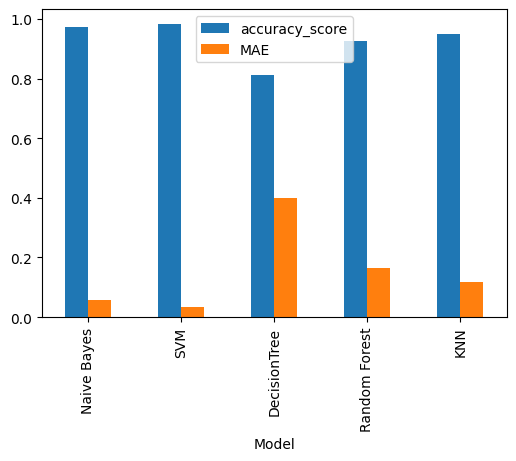

In [23]:
pd.DataFrame(score, columns=['Model','accuracy_score', 'MAE', 'MSE', 'RMSE']).plot(x="Model"
                                                                                   , y=["accuracy_score", "MAE"]
                                                                                   , kind="bar", figsize=(6,4))